In [51]:
from gsmmutils.model import ModelValidator, MyModel
import gsmmutils
gsmmutils.model.model_validator.DATA_PATH =  "../results"
import seaborn as sns
DATA_PATH = r"../data"
from os.path import join
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(7.08,3)})
sns.set_theme(context='paper', palette="colorblind", font='Arial')
plt.rcParams['axes.titlesize'] = 10
plt.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": "Arial",
})
plt.rcParams['axes.labelsize'] = 9
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9
plt.rcParams['font.size'] = 9
plt.rcParams['font.family'] = 'Arial'
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Define the custom colorblind-friendly palette
custom_palette = ["#55A868", "#4C72B0", "#DD8452"]

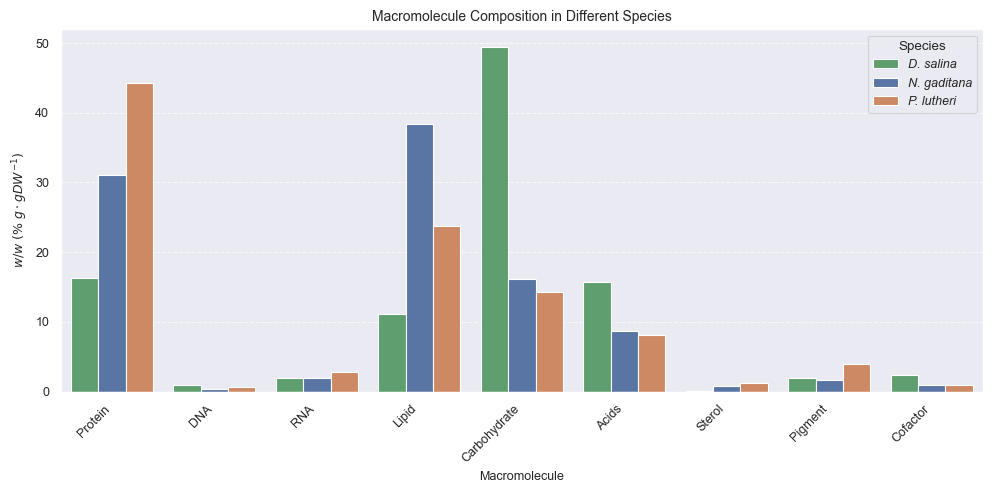

In [55]:
# Data for the plot
categories = ['Protein', 'DNA', 'RNA', 'Lipid', 'Carbohydrate', 'Acids', 'Sterol', 'Pigment', 'Cofactor']
values_d_salina = [16.27, 1.00, 2.00, 11.10, 49.5, 15.78, 0.14, 2.00, 2.31]
values_n_gaditana = [31.08, 0.33, 1.93, 38.36, 16.18, 8.69, 0.78, 1.68, 0.95]
values_p_lutheri = [44.21, 0.63, 2.87, 23.73, 14.32, 8.16, 1.24, 3.95, 0.90]

# Create a DataFrame for Seaborn
species = ["D. salina"] * len(categories) + ["N. gaditana"] * len(categories) + ["P. lutheri"] * len(categories)
data = pd.DataFrame({
    "Macromolecule": categories * 3,
    "Composition (% g/gDW)": values_d_salina + values_n_gaditana + values_p_lutheri,
    "Species": species
})

# Create the plot
plt.figure(figsize=(10, 5))
sns.barplot(
    data=data,
    x="Macromolecule",
    y="Composition (% g/gDW)",
    hue="Species",
    palette=custom_palette
)

# Add labels and title
plt.xlabel("Macromolecule")
plt.ylabel(r"$w/w \ (\% \ g \cdot gDW^{-1})$")
plt.title("Macromolecule Composition in Different Species")
plt.xticks(rotation=45, ha="right")
legend = plt.legend(title="Species", loc="upper right")

for text in legend.get_texts():
    text.set_fontstyle("italic")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and show the plot
plt.tight_layout()
plt.savefig("../results/figures/macromolecule_composition.pdf", dpi=1200, bbox_inches="tight", format="pdf")
plt.show()


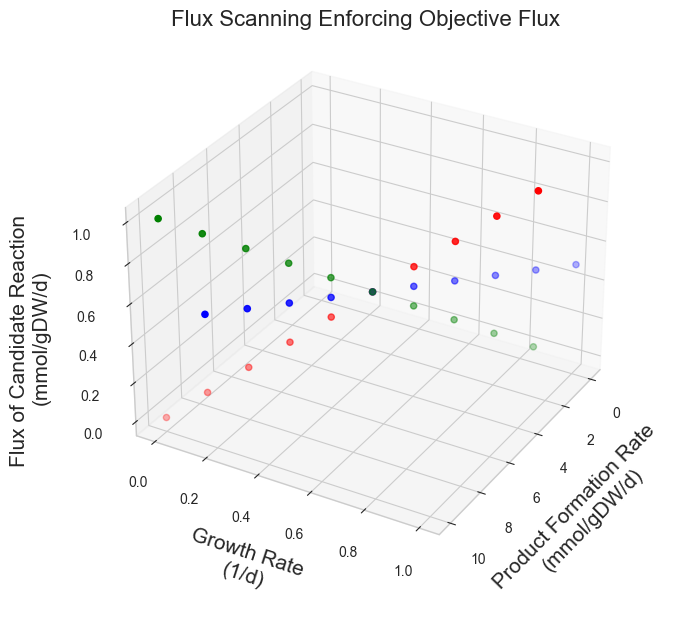

In [3]:
# create a 3d scatter plot showing the flux scanning enforcing objective function flux 

fig = plt.figure(figsize=(7, 7))
# set theme
plt.style.use('seaborn-whitegrid')

plt.rcParams['xtick.major.pad'] = 10
ax = fig.add_subplot(111, projection='3d')
# set title
ax.set_title('Flux Scanning Enforcing Objective Flux', fontdict={'size': 16}, pad=0)
increase = np.array([[10-e for e in range(10)], [e/10 for e in range(10)], [e/10 for e in range(10)]])
unchanged = np.array([[e for e in range(10)], [(10-e)/10 for e in range(10)], [0.5 for _ in range(10)]])
decrease = np.array([[10-e for e in range(10)], [e/10 for e in range(10)], [(10-e)/10 for e in range(10)]])

ax.scatter(increase[0,:], increase[1,:], increase[2,:], c='r', marker='o')
ax.scatter(unchanged[0,:], unchanged[1,:], unchanged[2,:], c='b', marker='o')
ax.scatter(decrease[0,:], decrease[1,:], decrease[2,:], c='g', marker='o')
# rotate axix
ax.view_init(30, 30)
ax.set_xlabel('Product Formation Rate \n(mmol/gDW/d)', fontdict={'size': 15}, labelpad=20)
ax.set_ylabel('Growth Rate \n(1/d)', fontdict={'size': 15}, labelpad=20)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Flux of Candidate Reaction \n(mmol/gDW/d)', rotation=90, fontdict={'size': 15}, labelpad=20)
# rotate z label
plt.savefig('flux_scanning_enforcing_objective_function_flux_method.png', dpi=1200, bbox_inches='tight')


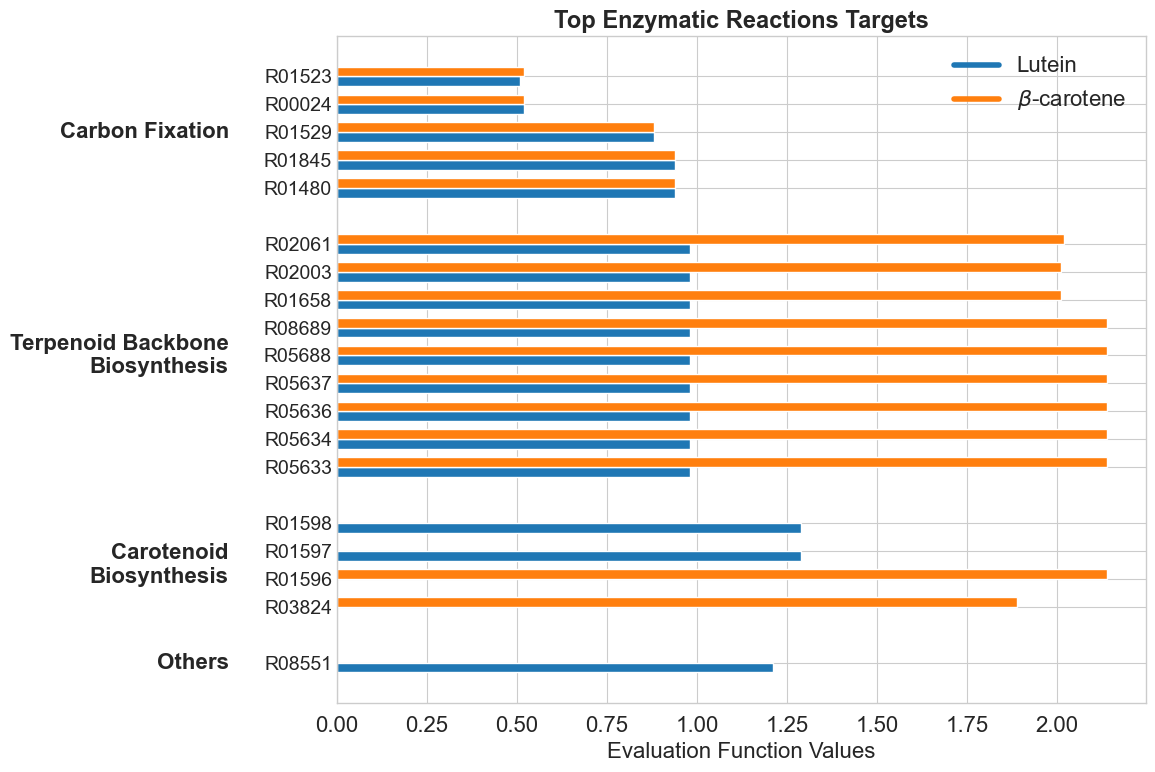

In [143]:
import matplotlib.pyplot as plt
import numpy as np

# Data
pathways = {
    "Terpenoid Backbone Biosynthesis": {
        "R05633": (0.98, 2.14), "R05634": (0.98, 2.14), "R05636": (0.98, 2.14),
        "R05637": (0.98, 2.14), "R05688": (0.98, 2.14), "R08689": (0.98, 2.14),
        "R01658": (0.98, 2.01), "R02003": (0.98, 2.01), "R02061": (0.98, 2.02)
    },
    "Carotenoid Biosynthesis": {
        "R03824": (0, 1.89), "R01596": (0, 2.14), "R01597": (1.29, 0), "R01598": (1.29, 0)
    },
    "Carbon Fixation": {
        "R01480": (0.94, 0.94), "R01845": (0.94, 0.94), "R01529": (0.88, 0.88),
        "R00024": (0.52, 0.52), "R01523": (0.51, 0.52)
    },
    "Others": {
        "R08551": (1.21, 0)
    }
}

# Specify the custom order
custom_order = [
    "Carbon Fixation",
    "Terpenoid Backbone Biosynthesis",
    "Carotenoid Biosynthesis",
    "Others"
]
custom_order.reverse()
# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

y_offset = 0
width = 0.35  # bar width
pathway_y_positions = {}

# Adding gap between pathways
gap = 1  # Increase this value to add more space between pathways

# For y-ticks and labels
y_ticks = []
y_labels = []

# Define colors
color_1 = '#1f77b4'  # Color for Value 1
color_2 = '#ff7f0e'  # Color for Value 2

for pathway in custom_order:
    rxns = pathways[pathway]
    reactions = list(rxns.keys())
    values_1 = [v[0] for v in rxns.values()]
    values_2 = [v[1] for v in rxns.values()]
    
    y = np.arange(y_offset, y_offset + len(reactions))
    pathway_y_positions[pathway] = (y[0], y[-1])
    
    # Plotting bars with colors
    ax.barh(y - width/2, values_1, width, label=f'{pathway} - B-carotene', color=color_1)
    ax.barh(y + width/2, values_2, width, label=f'{pathway} - Lutein', color=color_2)
    
    # Collecting y-ticks and labels
    y_ticks.extend(y)
    y_labels.extend(reactions)
    
    y_offset += len(reactions) + gap  # Increase y_offset by len(reactions) + gap

ax.set_xlabel('Evaluation Function Values', fontsize=16)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_labels, fontsize=14)
ax.set_title('Top Enzymatic Reactions Targets', fontsize=17, fontweight='bold')

# Add pathway labels before the y-axis
for pathway, (y_start, y_end) in pathway_y_positions.items():
    if pathway == "Terpenoid Backbone Biosynthesis":
        pathway = "Terpenoid Backbone\nBiosynthesis"
    elif pathway == "Carotenoid Biosynthesis":
        pathway = "Carotenoid\nBiosynthesis"
    ax.text(-0.3, (y_start + y_end) / 2, pathway, va='center', ha='right', fontsize=16, fontweight='bold')

legend_labels = ['Lutein', r'$\beta$-carotene']
legend_handles = [plt.Line2D([0], [0], color=color_1, lw=4),
                  plt.Line2D([0], [0], color=color_2, lw=4)]
ax.legend(handles=legend_handles, labels=legend_labels, loc='upper right')

plt.tight_layout()
plt.savefig('top_enzymatic_reactions.png', dpi=1200, bbox_inches='tight')


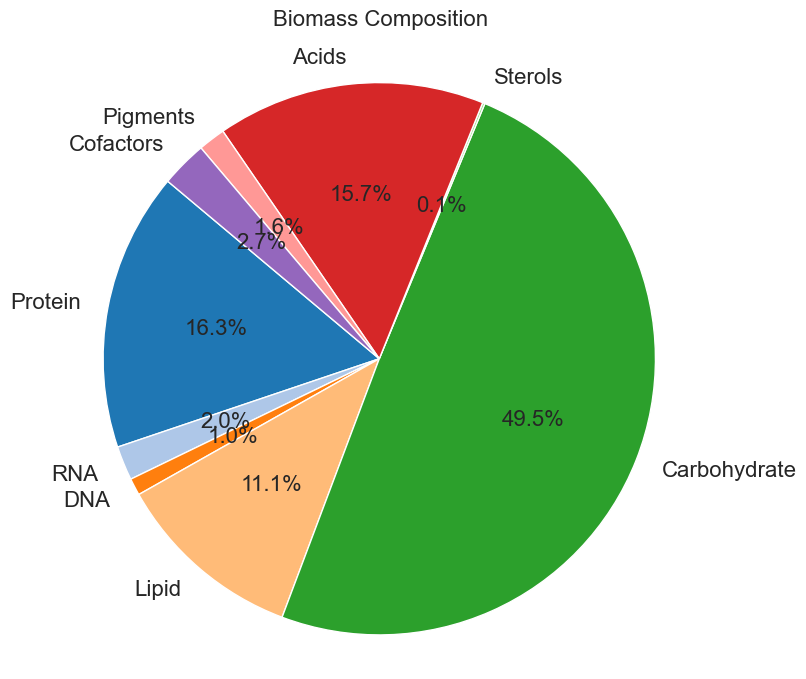

In [140]:
# create pie chart for experimental composition
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 8))
# set theme
# plt.style.use('seaborn-whitegrid')
# set title
plt.title('Biomass Composition', fontdict={'size': 16}, pad=20)
# create data
labels = ['Protein', 'RNA', 'DNA', 'Lipid', 'Carbohydrate', "Sterols", 'Acids', 'Pigments', 'Cofactors']
sizes = [0.163, 0.02, 0.01, 0.111, 0.495, 0.00138, 0.157, 0.0159,  0.02715]
# create pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors = plt.cm.tab20.colors)
plt.axis('equal')
plt.savefig('biomass_composition.png', dpi=1200, bbox_inches='tight')

In [104]:
ng = MyModel(join(DATA_PATH, 'models/model_ng.xml'), 'e_Biomass__cytop')
ng.set_prism_reaction("PRISM_solar_litho__extr")
print(ng.slim_optimize())
ds = MyModel(join(DATA_PATH, 'models/model_ds.xml'), 'e_Biomass__cytop')
ds.set_prism_reaction("PRISM_white_LED__extr")
print(ds.slim_optimize())
pl = MyModel(join(DATA_PATH, 'models/model_pl.xml'), 'e_Biomass__cytop')
pl.set_prism_reaction("PRISM_fluorescent_cool_215W__extr")
print(pl.slim_optimize())

Loading

Reactions: 4656
Metabolites: 4127
Genes: 1350
Model loaded
0.1729741037137229


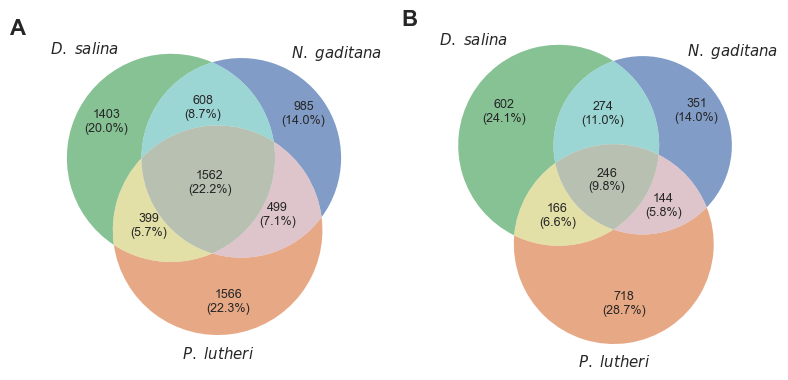

In [88]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Define three sets of strings
ds_reactions = {r.id.split("__")[0] for r in ds.reactions}
ng_reactions = {r.id.split("__")[0] for r in ng.reactions}
pl_reactions = {r.id.split("__")[0] for r in pl.reactions}

ds_bmgr_reactions = {r.id.split("__")[0] for r in ds.reactions if r.id.startswith("BMGR")}
ng_bmgr_reactions = {r.id.split("__")[0] for r in ng.reactions if r.id.startswith("BMGR")}
pl_bmgr_reactions = {r.id.split("__")[0] for r in pl.reactions if r.id.startswith("BMGR")}

# Total elements for percentages
total_elements = len(ds_reactions | ng_reactions | pl_reactions)
total_bmgr_elements = len(ds_bmgr_reactions | ng_bmgr_reactions | pl_bmgr_reactions)

# Create the Venn diagrams
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Plot 1: All reactions
venn1 = venn3((ds_reactions, ng_reactions, pl_reactions), (r"$\it{D.\ salina}$", r"$\it{N.\ gaditana}$", r"$\it{P.\ lutheri}$"),
              set_colors=("#55A868", "#4C72B0", "#DD8452"), alpha=0.7, ax=axes[0])

axes[0].text(-0.1, 1, f"A", ha='left', va='center', fontsize=16, fontweight='bold', transform=axes[0].transAxes)

for idx, label in enumerate(venn1.subset_labels):
    if label is not None:  # Ensure the subset exists
        value = int(label.get_text())
        percentage = (value / total_elements) * 100
        label.set_text(f"{value}\n({percentage:.1f}%)")

# Plot 2: Reactions starting with "BMGR"
venn2 = venn3((ds_bmgr_reactions, ng_bmgr_reactions, pl_bmgr_reactions), (r"$\it{D.\ salina}$", r"$\it{N.\ gaditana}$", r"$\it{P.\ lutheri}$"),
              set_colors=("#55A868", "#4C72B0", "#DD8452"), alpha=0.7, ax=axes[1])

for idx, label in enumerate(venn2.subset_labels):
    if label is not None:  # Ensure the subset exists
        value = int(label.get_text())
        percentage = (value / total_bmgr_elements) * 100
        label.set_text(f"{value}\n({percentage:.1f}%)")
axes[1].text(-0.1, 1, f"B", ha='left', va='center', fontsize=16, fontweight='bold', transform=axes[1].transAxes)
# Save and show the plots
plt.tight_layout()
plt.savefig('../results/figures/common_reactions_and_bmgr.pdf', dpi=1200, bbox_inches='tight', format='pdf')
plt.show()


In [105]:
def get_desaturases(model):
    print(f"Model: {model.id}")
    counter = 0
    for gene in model.genes:
        reactions = gene.reactions
        ec_numbers = set()
        for reaction in reactions:
            ec_numbers_tmp = reaction.annotation.get("ec-code", "")
            if isinstance(ec_numbers_tmp, list):
                for ec in ec_numbers_tmp:
                    if ec.startswith("1.14.19."):
                        ec_numbers.add(ec)
            else:
                if ec_numbers_tmp.startswith("1.14.19."):
                    ec_numbers.add(ec_numbers_tmp)
        if ec_numbers:
            counter += 1  
            print(gene.id, ec_numbers)
    print(f"Total desaturases: {counter}")
get_desaturases(ds)
get_desaturases(ng)
get_desaturases(pl)

Model: model_dsalina_light_debug
KAF5835722_1 {'1.14.19.47'}
KAF5827951_1 {'1.14.19.20'}
KAF5835254_1 {'1.14.19.2'}
KAF5834306_1 {'1.14.19.20'}
KAF5827793_1 {'1.14.19.23'}
KAF5831839_1 {'1.14.19.6', '1.14.19.22'}
KAF5828427_1 {'1.14.19.23'}
KAF5827794_1 {'1.14.19.23'}
KAF5831187_1 {'1.14.19.30', '1.14.19.31'}
KAF5839218_1 {'1.14.19.35', '1.14.19.36', '1.14.19.25'}
KAF5837262_1 {'1.14.19.41'}
KAF5828985_1 {'1.14.19.42'}
KAF5838958_1 {'1.14.19.2'}
Total desaturases: 13
Model: model_ngaditana_lipids_v2
Ng07786_RA {'1.14.19.44'}
Ng07909_RA {'1.14.19.1'}
Ng00522_RA {'1.14.19.6'}
Ng07312_RA {'1.14.19.35', '1.14.19.36', '1.14.19.25'}
Ng00828_RA {'1.14.19.20'}
Ng00575_RA {'1.14.19.17'}
Ng03910_RA {'1.14.19.30'}
Ng00159_RA {'1.14.19.2'}
Ng09792_RA {'1.14.19.3', '1.14.19.47'}
Ng10816_RA {'1.14.19.45'}
Ng06183_RA {'1.14.19.6', '1.14.19.22'}
Total desaturases: 11
Model: model_plutheri_validation_v2
KAG8462049_1 {'1.14.19.31'}
KAG8469325_1 {'1.14.19.17'}
KAG8458295_1 {'1.14.19.3', '1.14.19.30'}
KAG